In [123]:
import numpy as np
import pandas as pd
from collections import OrderedDict
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Plot styling
plt.style.use('seaborn-poster')  # Better sizing
plt.style.use('seaborn-white')   # White background

In [2]:
## MAF Specifications are here:
## https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/
## https://wiki.nci.nih.gov/display/TCGA/Mutation+Annotation+Format+(MAF)+Specification
## https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/

in_path_varscan = 'data/maf/6c93f518-1956-4435-9806-37185266d248/TCGA.BRCA.varscan.6c93f518-1956-4435-9806-37185266d248.DR-10.0.somatic.maf.gz'
in_path_muse = 'data/maf/b8ca5856-9819-459c-87c5-94e91aca4032/TCGA.BRCA.muse.b8ca5856-9819-459c-87c5-94e91aca4032.DR-10.0.somatic.maf.gz'
in_path_ss = 'data/maf/7dd592e3-5950-4438-96d5-3c718aca3f13/TCGA.BRCA.somaticsniper.7dd592e3-5950-4438-96d5-3c718aca3f13.DR-10.0.somatic.maf.gz'
in_path_mutect = 'data/maf/995c0111-d90b-4140-bee7-3845436c3b42/TCGA.BRCA.mutect.995c0111-d90b-4140-bee7-3845436c3b42.DR-10.0.somatic.maf.gz'

In [3]:
## Concatenate df's vertically

## Define column types
col_type_map = {
    'Chromosome': np.unicode,
    'Start_Position': np.int64,
    'End_Position': np.int64,
    'SYMBOL': np.unicode,
    'Reference_Allele': np.unicode,
    'Allele': np.unicode,
    'Variant_Classification': np.unicode,
    'IMPACT': np.unicode,
    'Variant_Type': np.unicode,
    'Tumor_Sample_Barcode': np.unicode,
}
keep_cols = col_type_map.keys()

## Concatenate vertically
in_paths = [
    in_path_varscan, 
    in_path_muse, 
    in_path_ss, 
    in_path_mutect
]
df = pd.concat([
        pd.read_table(
            path, 
            dtype = col_type_map,
            usecols = keep_cols,
            comment = '#')
        for path in in_paths
])

n_samples = df['Tumor_Sample_Barcode'].nunique()
print('Shape of combined frame: {}'.format(df.shape))
print('Number of sampled individuals: {}'.format(n_samples))
df.head()

Shape of combined frame: (370461, 10)
Number of sampled individuals: 986


,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Sample_Barcode,Allele,SYMBOL,IMPACT
0,chr1,1916819,1916819,Missense_Mutation,SNP,C,TCGA-A2-A3Y0-01A-11D-A23C-09,G,CALML6,MODERATE
1,chr1,2172304,2172304,Missense_Mutation,SNP,G,TCGA-A2-A3Y0-01A-11D-A23C-09,C,PRKCZ,MODERATE
2,chr1,3766586,3766586,Missense_Mutation,SNP,G,TCGA-A2-A3Y0-01A-11D-A23C-09,A,CCDC27,MODERATE
3,chr1,6040634,6040634,Silent,SNP,G,TCGA-A2-A3Y0-01A-11D-A23C-09,C,KCNAB2,LOW
4,chr1,23961791,23961791,Missense_Mutation,SNP,A,TCGA-A2-A3Y0-01A-11D-A23C-09,G,PNRC2,MODERATE


In [4]:
## Rename and reorder columns

col_name_map = OrderedDict([
    ('Chromosome', 'CHR'),
    ('Start_Position', 'START'),
    ('End_Position', 'END'),
    ('SYMBOL', 'GENE'),
    ('Reference_Allele', 'REF'),
    ('Allele', 'ALT'),
    ('Variant_Classification', 'CLASS'),
    ('IMPACT', 'IMPACT'),
    ('Variant_Type', 'TYPE'),
    ('Tumor_Sample_Barcode', 'BARCODE'),
])
keep_cols = list(col_name_map.values()) # Need list() because its odict
df.rename(columns=col_name_map, inplace=True)
df = df[keep_cols]

In [5]:
## Create new columns from old
df['SAMPLE'] = df.BARCODE.str[0:12]
df['MUTATION'] = df.CHR.str.cat([
    df.GENE, 
    df.START.map(str), 
    df.END.map(str), 
    df.REF, 
    df.ALT], 
    sep = ':'
)

In [6]:
## Remove duplicates
df.drop_duplicates(inplace = True)

In [92]:
## Preview
print('Shape of total frame: {}'.format(df.shape))
# pretty_preview(df)
df.head(10)

Shape of total frame: (132916, 12)


,CHR,START,END,GENE,REF,ALT,CLASS,IMPACT,TYPE,BARCODE,SAMPLE,MUTATION
0,chr1,1916819,1916819,CALML6,C,G,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:CALML6:1916819:1916819:C:G
1,chr1,2172304,2172304,PRKCZ,G,C,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:PRKCZ:2172304:2172304:G:C
2,chr1,3766586,3766586,CCDC27,G,A,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:CCDC27:3766586:3766586:G:A
3,chr1,6040634,6040634,KCNAB2,G,C,Silent,LOW,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:KCNAB2:6040634:6040634:G:C
4,chr1,23961791,23961791,PNRC2,A,G,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:PNRC2:23961791:23961791:A:G
5,chr1,28236188,28236188,ATPIF1,C,G,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:ATPIF1:28236188:28236188:C:G
6,chr1,40422316,40422316,SMAP2,C,G,3'UTR,MODIFIER,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:SMAP2:40422316:40422316:C:G
7,chr1,42577033,42577033,CCDC30,T,G,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:CCDC30:42577033:42577033:T:G
8,chr1,45621953,45621953,CCDC17,G,A,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:CCDC17:45621953:45621953:G:A
9,chr1,92843906,92843906,FAM69A,C,G,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:FAM69A:92843906:92843906:C:G


Stats to explore:

* Breakdown by individual
     * I did breakdown by most number of total mutations, but maybe I should also try unique per gene or unique per (more intelligent grouping - functional?)
* Genes with most number of unique mutations
* Genes with most number of total mutations
* Genes with most number of unique individuals mutatated
* Genes with most number of total individuals mutated
* All of the above but stratified by e.g. variant type or impact


In [8]:
## Count unique elements in a column
n_genes = df.GENE.nunique()
n_samples = df.BARCODE.nunique()
n_mutations = df.MUTATION.nunique()
n_mutation_classes = df.CLASS.nunique()

print('Number of unique')
print('\tSamples: {}\n\tGenes: {}\n\tMutations: {} \n\tMutation Classes: {}\n'.format(
    n_samples, n_genes, n_mutations, n_mutation_classes
))

Number of unique
	Samples: 986
	Genes: 19167
	Mutations: 130611 
	Mutation Classes: 18



In [9]:
## Factor level counts
print('Counts per CLASS:')
display(df.CLASS.value_counts())

print('Counts per IMPACT:')
display(df.IMPACT.value_counts())

print('Counts per TYPE:')
display(df.TYPE.value_counts())

print('Top repeated (>10) mutations:')
mut_counts = df.MUTATION.value_counts()
display(mut_counts[mut_counts.gt(10)])

Counts per CLASS:


Missense_Mutation         66371
Silent                    23881
3'UTR                     11052
Intron                     6990
Nonsense_Mutation          6056
Frame_Shift_Del            3661
5'UTR                      3392
RNA                        2543
Frame_Shift_Ins            1975
Splice_Site                1921
Splice_Region              1537
3'Flank                    1132
5'Flank                     906
In_Frame_Del                869
In_Frame_Ins                433
Nonstop_Mutation             93
Translation_Start_Site       90
IGR                          14
Name: CLASS, dtype: int64

Counts per IMPACT:


MODERATE    67648
MODIFIER    26059
LOW         25413
HIGH        13796
Name: IMPACT, dtype: int64

Counts per TYPE:


SNP    121319
DEL      7316
INS      4281
Name: TYPE, dtype: int64

Top repeated (>10) mutations:


chr3:PIK3CA:179234297:179234297:A:G         121
chr3:PIK3CA:179218303:179218303:G:A          63
chr3:PIK3CA:179218294:179218294:G:A          43
chr1:ST6GALNAC3:76576946:76576947:-:AAAC     33
chr14:AKT1:104780214:104780214:C:T           25
chr3:MUC4:195783009:195783009:C:T            21
chr10:GATA3:8069470:8069471:CA:-             21
chr3:MUC4:195783008:195783008:A:G            20
chr17:TP53:7675088:7675088:C:T               20
chr15:GOLGA6L6:20535018:20535018:C:T         17
chr3:PIK3CA:179203765:179203765:T:A          17
chr3:PIK3CA:179234297:179234297:A:T          13
chr6:OPRM1:154107953:154107958:TTTTTA:-      13
chr17:TP53:7673802:7673802:C:T               12
chr1:NBPF12:146963189:146963189:G:C          11
chr16:PKD1P6:15104542:15104542:T:A           11
Name: MUTATION, dtype: int64

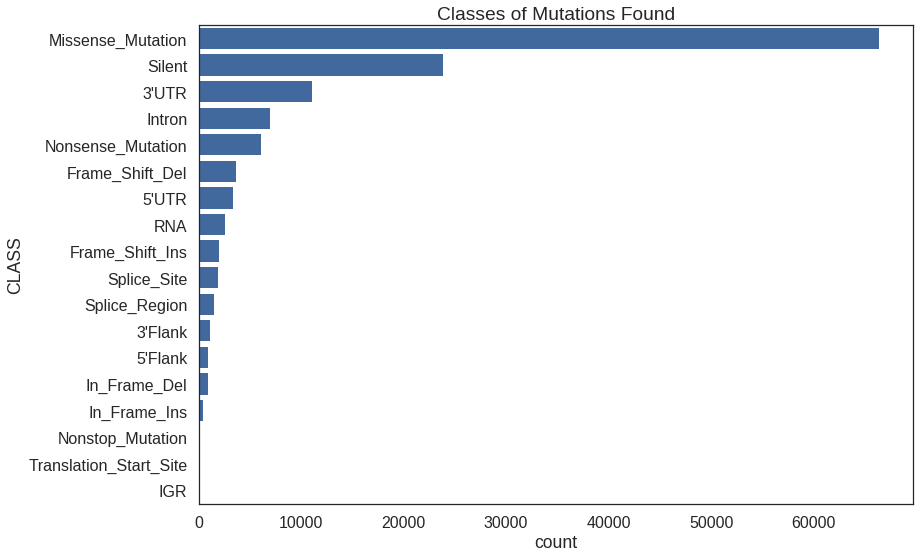

In [10]:
## Ordered bar plots
sns.countplot(y='CLASS', 
              data=df, 
              color='#3267AD',
              order = df.CLASS.value_counts().index
)
plt.title('Classes of Mutations Found')
plt.show()

Most mutations:
SAMPLE
TCGA-AN-A046    7948
TCGA-AC-A23H    6711
TCGA-5L-AAT1    2117
TCGA-BH-A18G    2033
TCGA-AN-A0AK    2029
TCGA-A8-A09Z    1924
TCGA-BH-A0HF    1695
TCGA-AO-A128    1644
TCGA-D8-A1XK    1541
TCGA-BH-A0B6    1419
TCGA-D8-A1XQ    1274
TCGA-D8-A1JA    1245
TCGA-D8-A27G    1191
TCGA-D8-A1J8    1127
TCGA-AR-A0U0    1125
dtype: int64

Least mutations:
SAMPLE
TCGA-AC-A2FF    19
TCGA-A2-A0ES    18
TCGA-AC-A2FB    17
TCGA-AR-A252    16
TCGA-AR-A24W    16
TCGA-LL-A440    16
TCGA-AO-A1KO    15
TCGA-A2-A1G6    12
TCGA-A8-A08C     9
TCGA-A2-A25F     7
dtype: int64


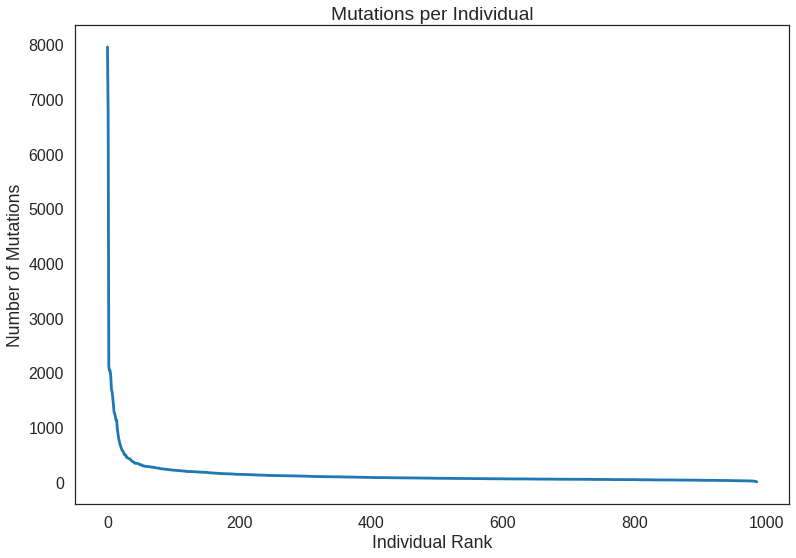

In [11]:
## Ranking summary
df_tmp = df.groupby('SAMPLE').size().sort_values(ascending=False)
print('Most mutations:')
print(df_tmp.iloc[0:15])
print('\nLeast mutations:')
print(df_tmp.iloc[-11:-1])

## Ranking plot
plt.plot(df_tmp.values)
plt.title('Mutations per Individual')
plt.xlabel('Individual Rank')
plt.ylabel('Number of Mutations')
plt.show()

In the below two cells we are going to explore three related but separate summaries. The nuance is whether we are counting unique occurences or aggregate occurences and on which factor.

Consider the following mock dataset. Simple GENE, SAMPLE, and MUTATION identifiers are used instead of the verbose realistic ones. 

| GENE | SAMPLE | MUTATION |
|:---: | :---: | :---: |
| A | 1 | $\alpha$ |
| A | 2 | $\alpha$ |
| A | 3 | $\alpha$ |
| B | 1 | $\beta$ |
| B | 1 | $\gamma$ |
| B | 2 | $\beta$ |
| B | 2 | $\gamma$ |
| C | 1 | $\delta$ |
| C | 1 | $\epsilon$ |
| C | 1 | $\zeta$ |

For quantifying the number of mutations, we might be interested in any of the following three metrics:

* Genes with the most samples mutated
* Genes with the largest number of aggregate mutations
* Genes with the largest number of unique mutations

The counts for the above example are as follows (bolded cells are the highest count for the column):

| GENE | # Samples Mutated | # Aggregate Mutations | # Total Mutations
| :---: | :---: | :---: | :---: |
| A | **3** | 3 | 1 |
| B | 2 | **4** | 2 |
| C | 1 | 3 | **3** |

Clearly the metric used has an impact on the results. In the three cells below we'll cover calculations and plots for each metric.


In [133]:
## Count by groups
df_summary = df.groupby('GENE').agg(OrderedDict([
    ('MUTATION', ['size', 'nunique']),
    ('SAMPLE', ['nunique']),
]))

## Rename the MultiIndex cols
# This is why OrderedDict was used w/ agg()
df_summary.columns = [
    'N_MUTATIONS', 
    'N_UNIQUE_MUTATIONS', 
    'N_SAMPLES']

## Sort
df_summary.sort_values(
    ['N_SAMPLES', 'N_MUTATIONS'], 
    ascending = [False, True],
    inplace = True)
df_summary.head(10)

,N_MUTATIONS,N_UNIQUE_MUTATIONS,N_SAMPLES
GENE,,,
TP53,377,240,360
PIK3CA,384,82,339
TTN,472,472,243
MUC4,280,141,197
CDH1,154,133,149
MUC16,208,204,149
GATA3,150,107,141
MUC2,128,58,114
KMT2C,131,128,101


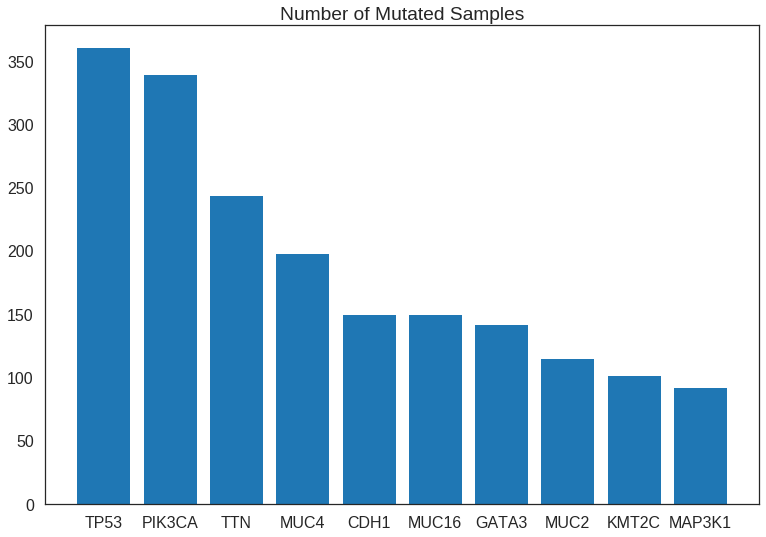

In [99]:
## Barplot for count by group

n_genes_to_plot = 10
top_genes = df_summary['N_SAMPLES'][0:n_genes_to_plot]
plt.bar(
    np.arange(n_genes_to_plot), 
    top_genes,
    tick_label = top_genes.index.tolist()
)
plt.title('Number of Mutated Samples')
plt.show()

In [110]:
## Count by multiple groups
df_impact = df.groupby(['GENE', 'IMPACT']).agg({
    'MUTATION': 'nunique'
})
df_impact.reset_index(inplace = True)
df_impact.head()

,GENE,IMPACT,MUTATION
0,A1BG,MODERATE,3
1,A1BG,MODIFIER,2
2,A1CF,HIGH,1
3,A1CF,LOW,1
4,A1CF,MODERATE,6


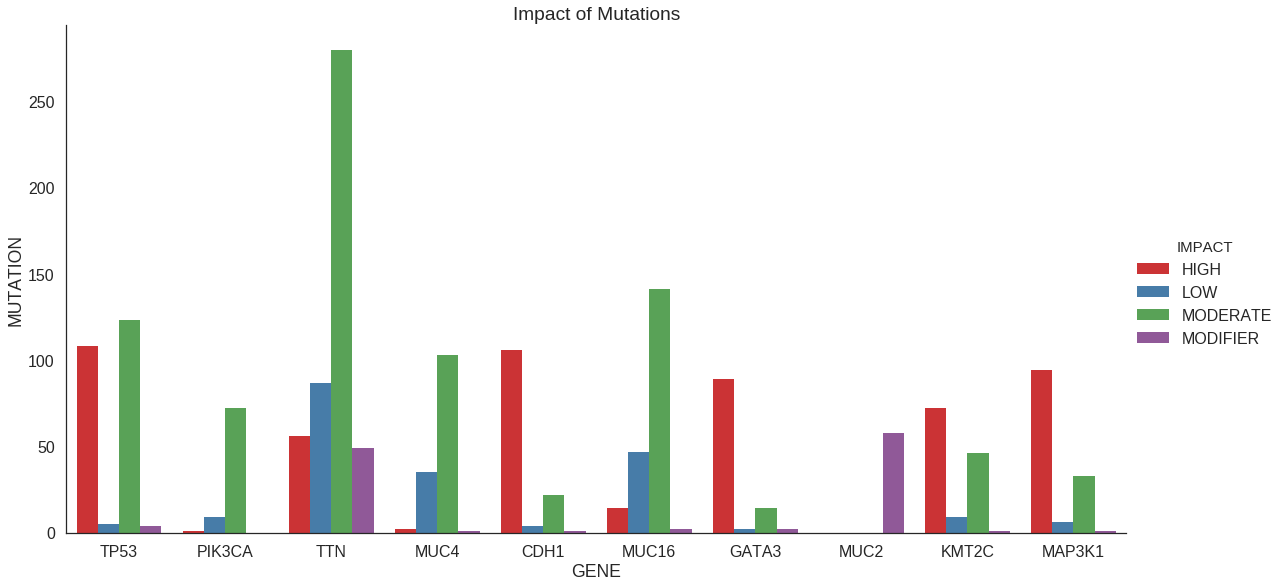

In [132]:
genes = df_summary.index.tolist()[0:10]
df_plt = df_impact.loc[df_impact['GENE'].isin(genes),]
df_plt.head()

## Plot styling
sns.factorplot(
    x = 'GENE',
    y = 'MUTATION',
    hue = 'IMPACT',
    order = genes,
    palette = 'Set1',
    kind = 'bar',
    size = 8,
    aspect = 2,
    data = df_plt
)
plt.title('Impact of Mutations')
# plt.legend(loc=0)
plt.show()